Importing Modules

In [1]:
import numpy as np 
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

 Load the dataset into the tool

In [4]:
vg_df = pd.read_csv('abalone.csv')

Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


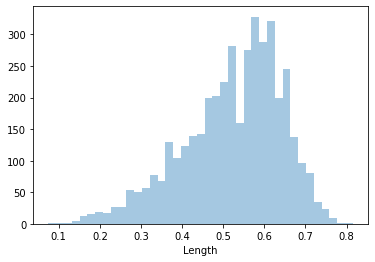

In [ ]:
sns.distplot(vg_df.Length.dropna(), kde=False, bins = 39);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


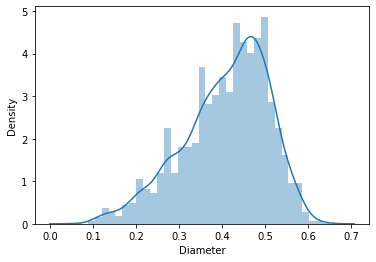

In [5]:
sns.distplot(vg_df.Diameter.dropna());

Bivariate Analysis

Text(0, 0.5, 'Diameter')

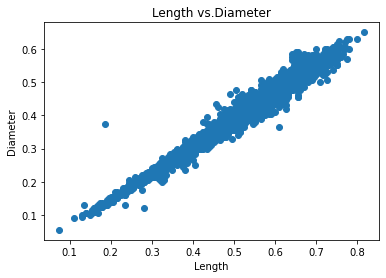

In [6]:
plt.scatter(vg_df.Length,vg_df.Diameter)
plt.title('Length vs.Diameter')
plt.xlabel('Length')
plt.ylabel('Diameter')

In [7]:
vg_df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [8]:
reviews = pd.read_csv("abalone.csv", index_col=0)
reviews.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


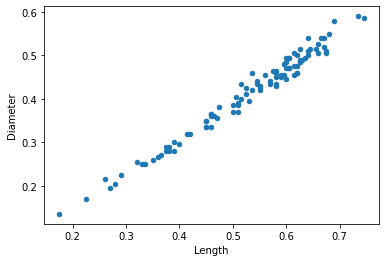

In [9]:
reviews[reviews['Diameter']<100].sample(100).plot.scatter(x='Length', y='Diameter')

In [10]:
wine_counts = pd.read_csv("abalone.csv",index_col=0)

In [11]:
wine_counts.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Multivariate Analysis

In [12]:
from pydoc import help 
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)
import os

In [ ]:
data=pd.read_csv("abalone.csv")
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]
X = data.loc[:, "V2":] # independent variables data
y = data.V1 # dependednt variable data
data

In [14]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


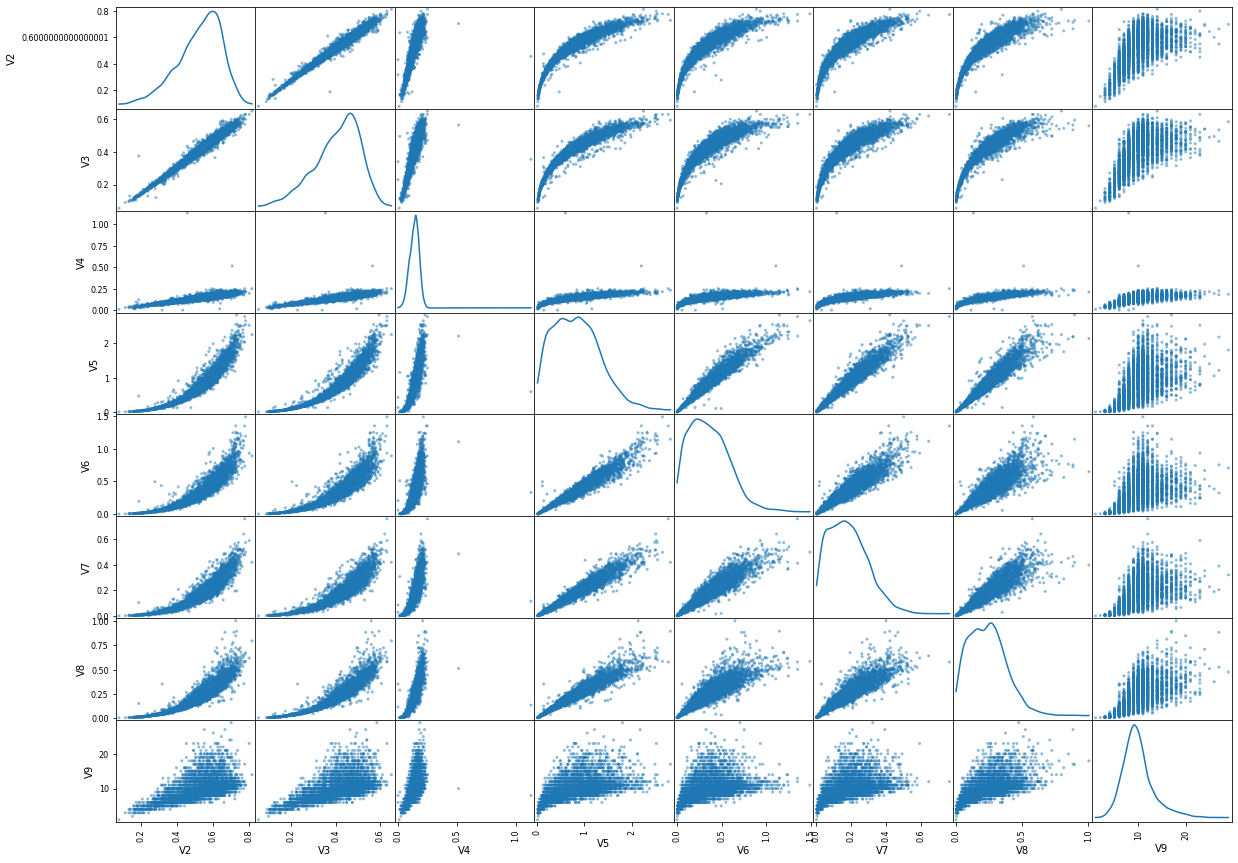

In [16]:
pd.plotting.scatter_matrix(data.loc[:, "V2":"V9"], diagonal="kde",figsize=(20,15))
plt.show()

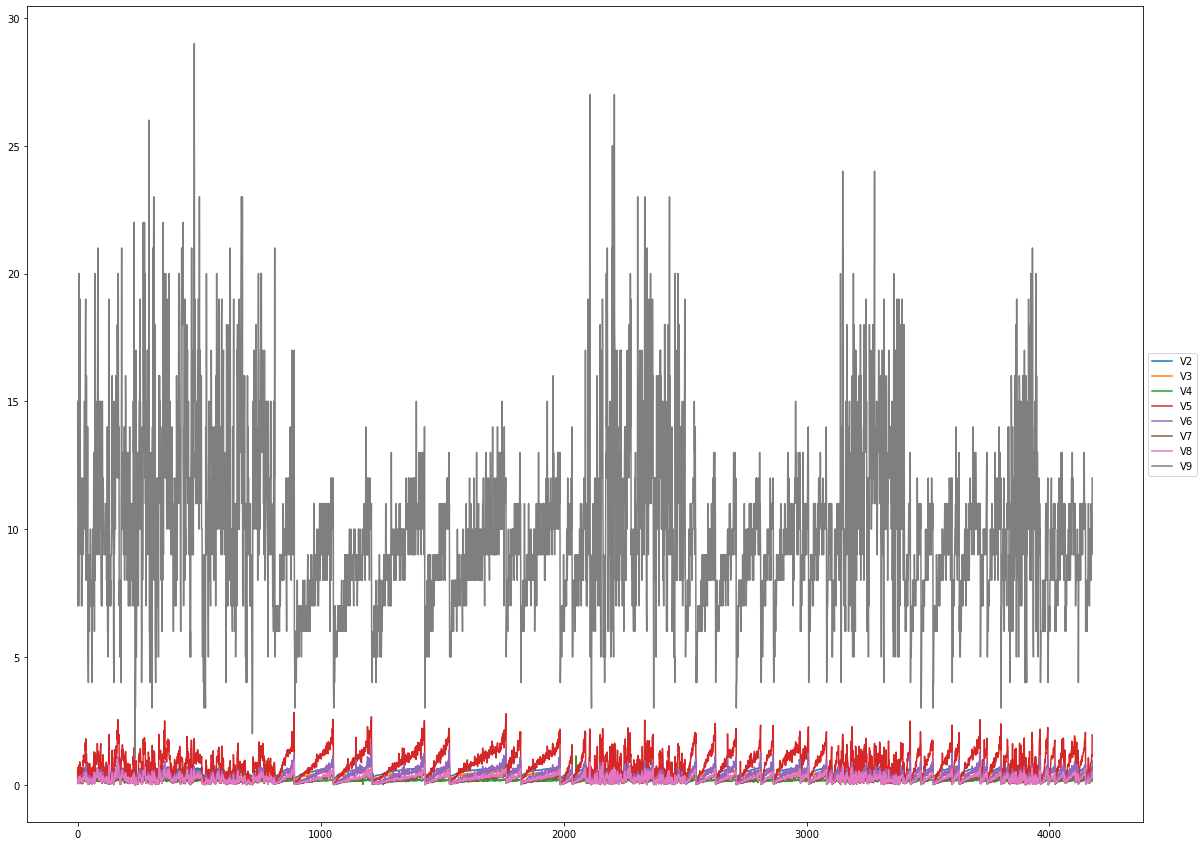

In [17]:
ax = data[["V2","V3","V4","V5","V6","V7","V8","V9"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

Descriptive ststistics

In [18]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [21]:
data.describe()

,V2,V3,V4,V5,V6,V7,V8,V9
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [22]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


V2    0.523992
V3    0.407881
V4    0.139516
V5    0.828742
V6    0.359367
V7    0.180594
V8    0.238831
V9    9.933684
dtype: float64

In [23]:
data.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


V2     0.064621
V3    -0.045476
V4    76.025509
V5    -0.023644
V6     0.595124
V7     0.084012
V8     0.531926
V9     2.330687
dtype: float64

In [24]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


V2    0.5450
V3    0.4250
V4    0.1400
V5    0.7995
V6    0.3360
V7    0.1710
V8    0.2340
V9    9.0000
dtype: float64

In [25]:
data.mode()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


V2   -0.639873
V3   -0.609198
V4    3.128817
V5    0.530959
V6    0.719098
V7    0.591852
V8    0.620927
V9    1.114102
dtype: float64

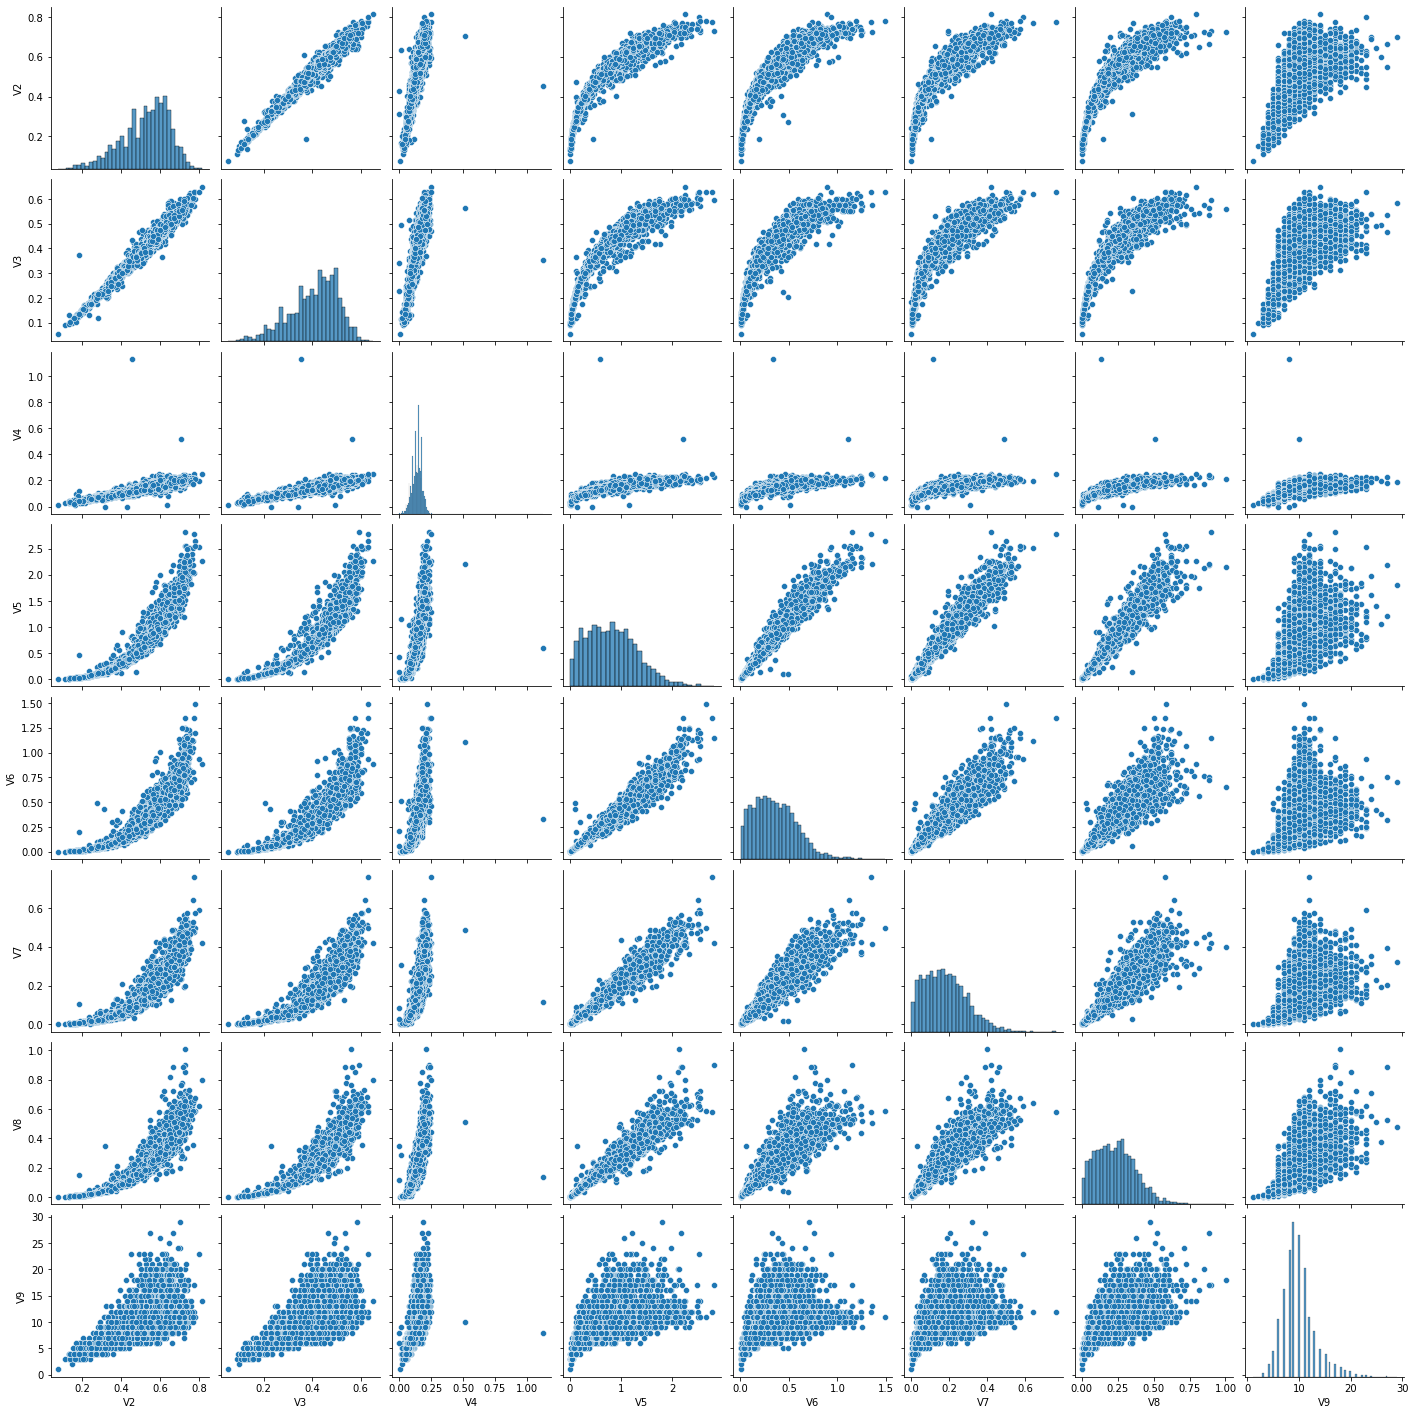

In [27]:
sns.pairplot(data)

Check for Missing values and deal with them

In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv("abalone.csv")

In [30]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [31]:
df.dropna()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [32]:
df.dropna(axis=1)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [33]:
df.dropna(axis=1, thresh=5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Find the outliers and replace them outliers

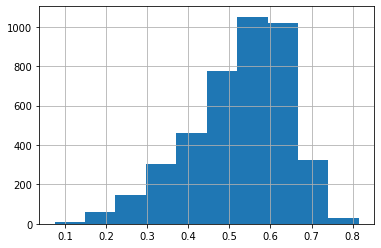

In [34]:
df['Length'].hist()

Outliers-IQR

In [35]:
import pandas 
import numpy 
ABALONE= pandas.read_csv("abalone.csv")

In [36]:
numeric_col = ['Length','Diameter','Height']
categorical_col = ['Sex']

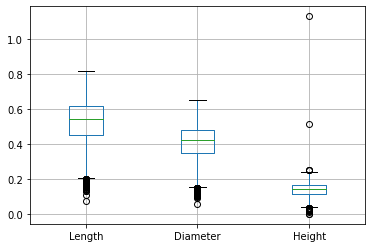

In [37]:
ABALONE.boxplot(numeric_col)

Replace the outliers

In [38]:
for x in ['Diameter']:
    q75,q25 = np.percentile(ABALONE.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    ABALONE.loc[ABALONE[x] < min,x] = np.nan
    ABALONE.loc[ABALONE[x] > max,x] = np.nan

In [39]:
ABALONE.isnull().sum()

Sex                0
Length             0
Diameter          59
Height             0
Whole weight       0
Shucked weight     0
Viscera weight     0
Shell weight       0
Rings              0
dtype: int64

In [40]:
ABALONE = ABALONE.dropna(axis =0)

In [41]:
ABALONE.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [42]:
import pandas as pd
import numpy as np
headers = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
df = pd.read_csv("abalone.csv",header=None, names=headers, na_values="?" )
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
2,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
3,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
4,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10


In [43]:
df.dtypes

Sex               object
Length            object
Diameter          object
Height            object
Whole weight      object
Shucked weight    object
Viscera weight    object
Shell weight      object
Rings             object
dtype: object

In [44]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
2,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
3,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
4,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10


In [45]:
obj_df[obj_df.isnull().any(axis=1)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [46]:
obj_df["Diameter"].value_counts()

0.45     139
0.475    120
0.4      111
0.5      110
0.47     100
        ... 
0.61       1
0.625      1
0.09       1
0.055      1
0.615      1
Name: Diameter, Length: 112, dtype: int64

In [47]:
obj_df = obj_df.fillna({"Diameter": "0.09"})

In [48]:
obj_df["Height"] = obj_df["Height"].astype('category')
obj_df.dtypes

Sex                 object
Length              object
Diameter            object
Height            category
Whole weight        object
Shucked weight      object
Viscera weight      object
Shell weight        object
Rings               object
dtype: object

In [49]:
obj_df["Height_1"] = obj_df["Height"].cat.codes
obj_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Height_1
0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,51
1,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,18
2,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7,17
3,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9,26
4,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10,24


Split the data into dependent and independent variables

In [50]:
X = df.iloc[:, :-1].values
print(X)

[['Sex' 'Length' 'Diameter' ... 'Shucked weight' 'Viscera weight'
  'Shell weight']
 ['M' '0.455' '0.365' ... '0.2245' '0.101' '0.15']
 ['M' '0.35' '0.265' ... '0.0995' '0.0485' '0.07']
 ...
 ['M' '0.6' '0.475' ... '0.5255' '0.2875' '0.308']
 ['F' '0.625' '0.485' ... '0.531' '0.261' '0.296']
 ['M' '0.71' '0.555' ... '0.9455' '0.3765' '0.495']]


In [51]:
Y = df.iloc[:, -1].values
print(Y)

['Rings' '15' '7' ... '9' '10' '12']


Scale the independent variables

In [52]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("abalone.csv")

X = df[['Height', 'Length']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-1.06442415 -0.57455813]
 [-1.18397831 -1.44898585]
 [-0.10799087  0.05003309]
 ...
 [ 1.56576738  0.6329849 ]
 [ 0.25067161  0.84118198]
 [ 1.32665906  1.54905203]]



Split the data into training and testing

In [53]:
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [54]:
X= df[['Length', 'Height']]  
Y= df[['Diameter']]

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

In [56]:
X_train

,Length,Height
1606,0.540,0.130
664,0.450,0.120
2219,0.485,0.145
85,0.570,0.180
3912,0.520,0.140
...,...,...
4149,0.280,0.070
1890,0.565,0.155
350,0.610,0.185
79,0.615,0.170


In [57]:
y_train

,Diameter
1606,0.425
664,0.355
2219,0.375
85,0.465
3912,0.405
...,...
4149,0.215
1890,0.455
350,0.495
79,0.475


In [58]:
X_test

,Length,Height
551,0.615,0.155
3245,0.695,0.160
1418,0.705,0.215
416,0.630,0.170
1553,0.390,0.100
...,...,...
3056,0.615,0.215
279,0.515,0.135
3770,0.565,0.125
106,0.545,0.165


In [59]:
y_test

,Diameter
551,0.490
3245,0.550
1418,0.555
416,0.500
1553,0.290
...,...
3056,0.485
279,0.425
3770,0.430
106,0.430


In [60]:
logir = LogisticRegression()
logir.fit(X,y)

LogisticRegression()

In [61]:
y_pred=logir.predict(X)
print (X) 
print (y_pred)

      Length  Height
0      0.455   0.095
1      0.350   0.090
2      0.530   0.135
3      0.440   0.125
4      0.330   0.080
...      ...     ...
4172   0.565   0.165
4173   0.590   0.135
4174   0.600   0.205
4175   0.625   0.150
4176   0.710   0.195

[4177 rows x 2 columns]
['I' 'I' 'M' ... 'M' 'M' 'F']


Measure the performance using Metrics

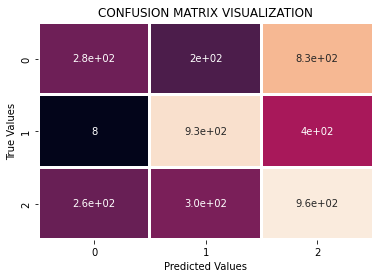

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           F       0.50      0.21      0.30      1307
           I       0.65      0.69      0.67      1342
           M       0.44      0.63      0.52      1528

    accuracy                           0.52      4177
   macro avg       0.53      0.51      0.49      4177
weighted avg       0.53      0.52      0.50      4177

